# Piecewise Exact Method

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# System constants
m = 1000        # Mass [kg]
k = 20000       # Stifness [N/m]
xi = 0.05       # Damping ratio
P = 750         # Force magnitude [N]
f = 1           # Force frequency [Hz]

# Calculating dynamic parameters
omega_n = np.sqrt(k / m)                # Natural frequency [rad/s]
f_n = omega_n / (2 * np.pi)             # Undamped natural frequency [Hz]
omega_d = omega_n * np.sqrt(1 - xi**2)  # Damped natural frequency [rad/s]
omega = 2 * np.pi * f                   # Force frequency [rad/s]
beta = omega / omega_n                  # Frequency ratio

# Defining a "experimental force" vector
t_max = 30                              # Maximun time [s]
delta_t = 0.01                          # Time step [s]
nPoints = int(t_max / delta_t)          # Number of data points -> int
t = np.linspace(0, t_max, nPoints)      # Time vector [s]

P_sine = P * np.sin(omega * t)          # Experimental harmonic force [N]

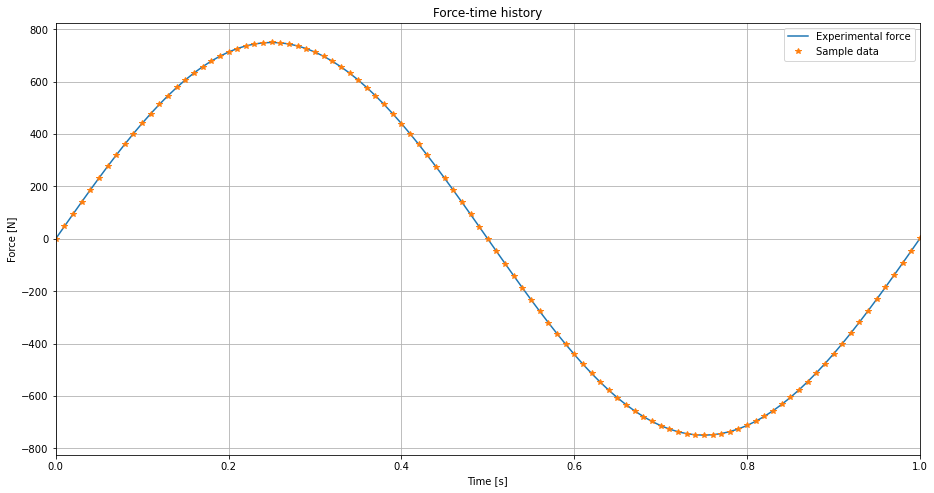

In [4]:
# Plotting the data
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t, P_sine, label="Experimental force")
axes.plot(t, P_sine, "*", label="Sample data")
axes.legend()
axes.set_title("Force-time history")
axes.set_xlim([0, 1])
axes.set_xlabel("Time [s]")
axes.set_ylabel("Force [N]")
axes.grid()
fig.show()

## Function to calculate dynamic response

\begin{equation}
u_{n+1} = A\:u_n + B\:\dot{u}_{n} +C\:p_n + D\:p_{n+1}
\end{equation}

\begin{equation}
\dot{u}_{n+1} = A_1\:u_n + B_1\:\dot{u}_n + C_1\:p_n + D_1\:p_{n+1}
\end{equation}

where the constants $A$ to $D_1$ are given by ...

\begin{equation}
A = e^{-\xi\omega_nh}\left[\frac{\xi}{\sqrt{1-\xi^2}}\sin(\omega_dh) + \cos(\omega_dh) \right]
\end{equation}

\begin{equation}
B=e^{-\xi\omega_nh}\left[\frac{1}{\omega_d}\sin(\omega_dh) \right]
\end{equation}

\begin{equation}
C=\frac{1}{k}\left[\frac{2\xi}{\omega_nh} + e^{-\xi\omega_nh}\left(\left(\frac{1-2\xi^2}{\omega_dh} - \frac{\xi}{\sqrt{1-\xi^2}} \right)\sin(\omega_dh)-\left(1+\frac{2\xi}{\omega_n h} \right)\cos(\omega_dh)\right) \right]
\end{equation}

\begin{equation}
D=\frac{1}{k}\left[1-\frac{2\xi}{\omega_nh}+e^{-\xi\omega_nh}\left(\frac{2\xi^2-1}{\omega_dh}\sin(\omega_dh) + \frac{2\xi}{\omega_nh}\cos(\omega_dh) \right) \right]
\end{equation}

\begin{equation}
A_1=-e^{-\xi\omega_nh}\left[\frac{\omega_n}{\sqrt{1-\xi^2}}\sin(\omega_dh) \right]
\end{equation}

\begin{equation}
B_1=e^{-\xi\omega_nh}\left[\cos(\omega_dh)-\frac{\xi}{\sqrt{1-\xi^2}}\sin(\omega_dh) \right]
\end{equation}

\begin{equation}
C_1=\frac{1}{k}\left[-\frac{1}{h} + e^{-\xi\omega_nh}\left(\left(\frac{\omega_n}{\sqrt{1-\xi^2}} + \frac{\xi}{h\sqrt{1-\xi^2}} \right)\sin(\omega_dh) +\frac{1}{h}\cos(\omega_d h) \right) \right]
\end{equation}

\begin{equation}
D_1=\frac{1}{k}\left[\frac{1}{h} - \frac{e^{-\xi\omega_nh}}{h} \left(\frac{\xi}{\sqrt{1-\xi^2}}\sin(\omega_dh)+\cos(\omega_dh) \right)\right]
\end{equation}

### Reference
Humar, J.L., Dynamics of Structures, 2nd Edition

In [5]:
# Defining a function that takes in a time and force vector

def calculateResponse(tVector, fVector, x0, v0):
    """Function to calculate dynamic response to general loading
    tVector... vector of time
    fVector... vector of force
    x0... initial position
    v0... initial velocity"""

    nPoints = len(tVector)      # Number of data points

    # Calculating constants
    A = np.exp(-xi * omega_n * delta_t) * ((xi / (np.sqrt(1 - (xi**2)))) * np.sin(omega_d * delta_t) + np.cos(omega_d * delta_t))
    B = np.exp(-xi * omega_n * delta_t) * ((1 / omega_d * np.sin(omega_d * delta_t)))
    C = (1 / k) * (((2 * xi) / (omega_n * delta_t)) + np.exp(-xi * omega_n * delta_t) * ((((1 - 2 * (xi**2)) / (omega_d * delta_t)) -(xi / (np.sqrt(1 - (xi**2))))) * np.sin(omega_d * delta_t) - (1 + ((2*xi) / (omega_n * delta_t))) * np.cos(omega_d * delta_t)))
    D = (1 / k) * (1 - ((2*xi) / (omega_n * delta_t)) + np.exp(-xi * omega_n * delta_t) * (((2 * (xi**2) - 1) / (omega_d * delta_t))* np.sin(omega_d * delta_t) + ((2*xi) / (omega_n * delta_t)) * np.cos(omega_d * delta_t)))

    A1 = -np.exp(-xi * omega_n * delta_t) * ((omega_n / (np.sqrt(1 - (xi**2)))) * np.sin(omega_d * delta_t))
    B1 = np.exp(-xi * omega_n * delta_t) * (np.cos(omega_d * delta_t) - ((xi) / (np.sqrt(1 - (xi**2)))) * np.sin(omega_d * delta_t))
    C1 =(1 / k) * (-(1 / delta_t) + np.exp(-xi * omega_n * delta_t) * ((((omega_n) / (np.sqrt(1 - (xi**2)))) + ((xi) / (delta_t * np.sqrt(1 - (xi**2))))) * np.sin(omega_d * delta_t) + (1 / delta_t) * np.cos(omega_d * delta_t)))
    D1 =(1 / k) * ((1 / delta_t) - (np.exp(-xi * omega_n * delta_t) / delta_t) * ((xi / (np.sqrt(1 - (xi**2)))) * np.sin(omega_d * delta_t) + np.cos(omega_d * delta_t))) 

    # Initialize arrays to hold calculated position and velocity
    position = []
    velocity = []

    for n, timestep in enumerate(tVector):
        # Updating force values
        if n < nPoints - 1:
            Fn = fVector[n]
            Fn_p1 = fVector[n + 1]
        else:
            Fn = fVector[n]
            Fb_p1 = 0

        # Calculating the position and velocity at the end of the time step
        current_position = (A * x0) + (B * v0) + (C * Fn) + (D * Fn_p1)
        current_velocity = (A1 * x0) + (B1 * v0) + (C1 * Fn) + (D1 * Fn_p1)

        # Storing calculated values
        position.append(current_position)
        velocity.append(current_velocity)

        # Updating initial conditions for the next iterations
        x0 = current_position
        v0 = current_velocity
    
    return position, velocity

In [6]:
# Calling the function
position, velocity = calculateResponse(t, P_sine, 0, 0)

## Results

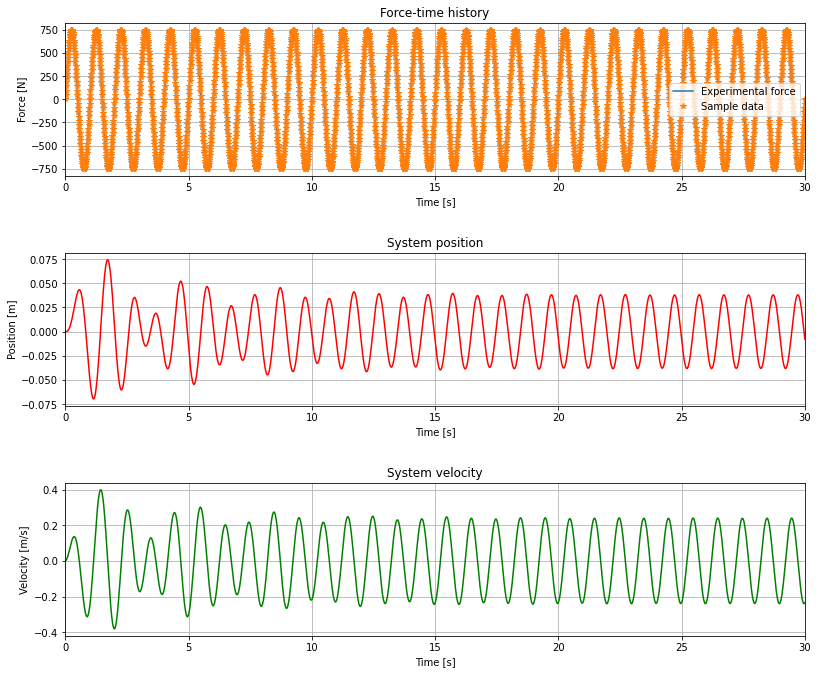

In [12]:
# Plotting the results
fig, axes = plt.subplots(figsize=(12, 10), nrows=3, ncols=1)

# Force plot
axes[0].plot(t, P_sine, label="Experimental force")
axes[0].plot(t, P_sine, "*", label="Sample data")
axes[0].legend()
axes[0].set_title("Force-time history")
axes[0].set_xlim([0, t_max])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Force [N]")
axes[0].grid()

# Position plot
axes[1].plot(t, position, "r-")
axes[1].set_title("System position")
axes[1].set_xlim([0, t_max])
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Position [m]")
axes[1].grid()

# Velocity plot
axes[2].plot(t, velocity, "g-")
axes[2].set_title("System velocity")
axes[2].set_xlim([0, t_max])
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Velocity [m/s]")
axes[2].grid()

fig.tight_layout(pad=3.0)
fig.show()

## Comparison to analytical solution

\begin{equation}
u(t) = \underbrace{e^{-\xi\omega_nt}[a\sin(\omega_dt) + b\cos(\omega_dt)]}_{\text{Transient}} + \underbrace{\frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right][(1-\beta^2)\sin(\omega t) - 2\xi\beta\cos(\omega t)]}_{\text{Steady-state}} 
\end{equation}

\begin{equation}
\Omega = \frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right]
\end{equation}

\begin{equation}
c_1 = \Omega\:(1-\beta^2)
\end{equation}

\begin{equation}
c_2 = -\Omega\:2\:\xi\:\beta
\end{equation}

\begin{equation}
\begin{split}
\dot{u}(t) =  & \:a\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt} \right] + \\  & \:b\left[ -e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt}\right] + \\ &\: c_1\:\omega\cos(\omega t) - c_2\: \:\omega\sin(\omega t)
\end{split}
\end{equation}

Expressions for $u(t)$ and $\dot{u}(t)$ can now be evaluated at $t=0$. Helpfully many of the terms disappear due to the fact $t=0$. Evaluating the two equations for the two unknowns, $a$ and $b$ yields,

\begin{equation}
a = -\frac{1}{\omega_d}(c_1\:\omega + c_2\:\xi\:\omega_n)
\end{equation}

\begin{equation}
b=-c_2
\end{equation}


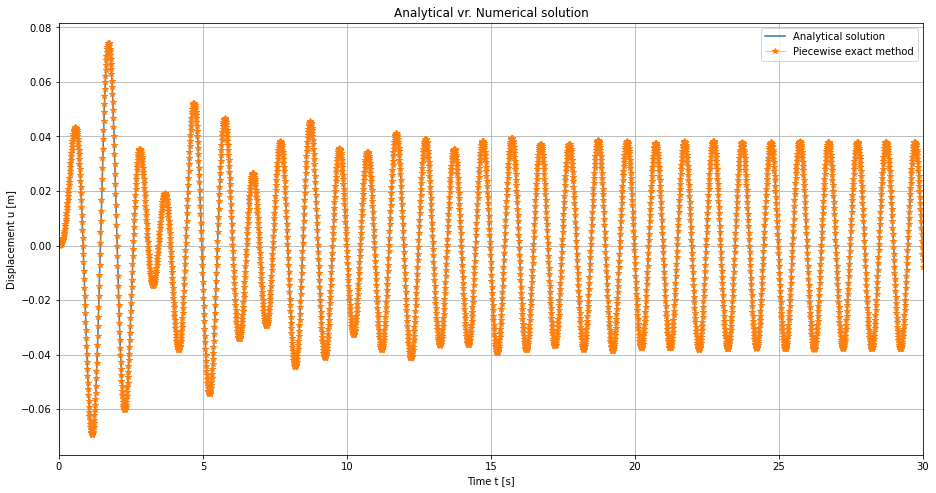

In [22]:
# Computing constant
O = (P / k) * (1 / ((1 - beta**2)**2 + (2 * xi * beta)**2))   #Capital Omega
c1 = O * (1 - beta**2)
c2 = -O * 2 * xi * beta
omega_d = omega_n * np.sqrt(1 - xi**2)                        # Damped natural frequency
a = (-1 / omega_d) * (c1 * omega + c2 * xi * omega_n)
b = -c2

# Evaluating transient respond, ut
ut = np.exp(-xi * omega_n * t) * (a * np.sin(omega_d * t) + b * np.cos(omega_d * t))

# Evaluating steady steat respond, up
up = O * ((1 - beta**2) * np.sin(omega * t) - (2 * xi * beta) * np.cos(omega * t))

# Displacement vetor, u
u = ut + up

# Plotting displacement
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1.5])
axes.plot(t, u, label="Analytical solution")
axes.plot(t, position, "*-", lw=0.5, label="Piecewise exact method")
axes.legend()
axes.set_title("Analytical vr. Numerical solution")
axes.set_xlim([0, t_max])
axes.set_xlabel("Time t [s]")
axes.set_ylabel("Displacement u [m]")
axes.grid()
fig.show()